# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
frq = pd.value_counts(df.zip).to_frame().reset_index()
frq.iloc[0:5]

,index,zip
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


** What are the top 5 townships (twp) for 911 calls? **

In [8]:
frq = pd.value_counts(df.twp).to_frame().reset_index()
frq.iloc[0:5]

,index,twp
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df.title.unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [10]:
# Number of unique title codes
len(df.title.unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
t = lambda a: a.split(":")[0]
df.title.apply(t)
df["reason"] = df.title.apply(t)

In [12]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [13]:
frq = pd.value_counts(df.reason).to_frame().reset_index()
frq.iloc[0:5]

,index,reason
0,EMS,48877
1,Traffic,35695
2,Fire,14920


In [14]:
frq["index"]

0        EMS
1    Traffic
2       Fire
Name: index, dtype: object

** Now use seaborn to create a countplot of 911 calls by Reason. **

<BarContainer object of 3 artists>

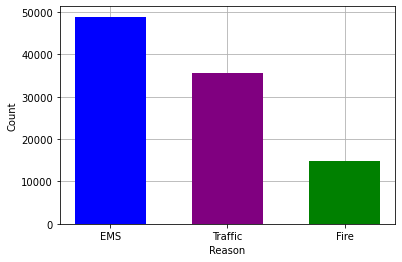

In [15]:
#one way
frq = pd.value_counts(df.reason).to_frame().reset_index()
fig, ax = plt.subplots()

#ax.bar(frq["index"], frq.reason, color = ["blue", "purple", "green"])
labs = ["EMS", "Traffic", "Fire"]

ax.set_ylabel('Count')
ax.set_xlabel('Reason')

ax.grid(zorder=0)
#ax.bar(range(len(frq.reason)), frq.reason, width=0.6, align='center', color = ["blue", "purple", "green"], zorder=3)
ax.bar(labs, frq.reason, width=0.6, align='center', color = ["blue", "purple", "green"], zorder=3)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [16]:
df.timeStamp

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [17]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [18]:
df.timeStamp

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [19]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [20]:
time.month

12

In [21]:
time.week

50

In [22]:
time.dayofweek

3

In [24]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['week'] = df['timeStamp'].apply(lambda x: x.week)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,week,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
import seaborn as sns

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

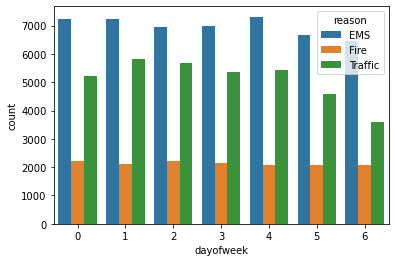

In [26]:
ax = sns.countplot(x="dayofweek", data=df, hue=df.reason)

**Now do the same for Month:**

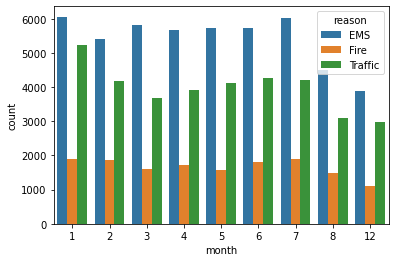

In [27]:
ax = sns.countplot(x="month", data=df, hue=df.reason)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [28]:
grp = df.groupby(by=df.month)

In [29]:
grp.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,week,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,3
7969,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:12:01,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,53,4
7970,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:17:00,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,53,4
7971,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:22:00,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,53,4
7972,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:27:01,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,53,4
7973,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:32:01,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,53,4


In [30]:
frq = pd.value_counts(df.month).to_frame().reset_index()
frq

,index,month
0,1,13205
1,7,12137
2,6,11786
3,2,11467
4,5,11423
5,4,11326
6,3,11101
7,8,9078
8,12,7969


In [32]:
frq = frq.sort_values(by="index")

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

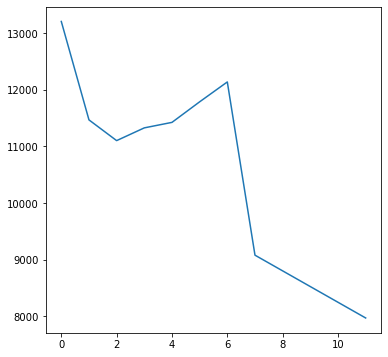

In [33]:
yln = np.array([0,1,2,3,4,5,6,7,11])
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(yln, frq.month)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

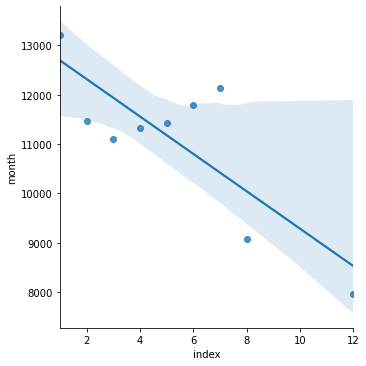

In [34]:
sns.lmplot(x = "index", y = "month", data = frq)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [36]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [37]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,week,dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,3,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,34,2,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,34,2,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,34,2,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,34,2,2016-08-24


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date', ylabel='title'>

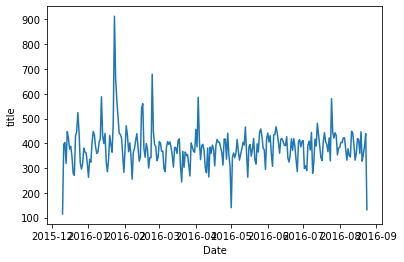

In [38]:
byDate = df.groupby(by="Date").count()['title']
sns.lineplot(data = byDate)

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

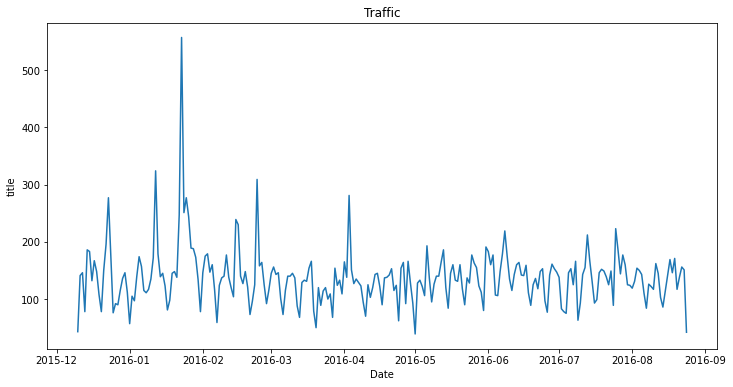

In [39]:
df1 = df[df['reason'] == "Traffic"]
byDate = df1.groupby(by="Date").count()['title']
plt.figure(figsize=(12, 6))
sns.lineplot(data = byDate).set_title('Traffic')

Text(0.5, 1.0, 'EMS')

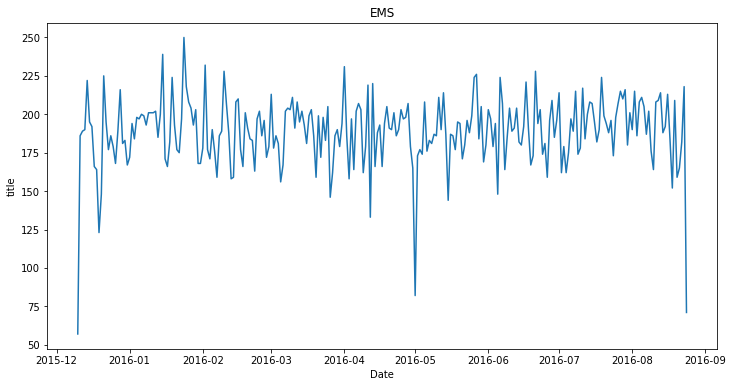

In [40]:
df1 = df[df['reason'] == "EMS"]
byDate = df1.groupby(by="Date").count()['title']
plt.figure(figsize=(12, 6))
sns.lineplot(data = byDate).set_title('EMS')

Text(0.5, 1.0, 'Fire')

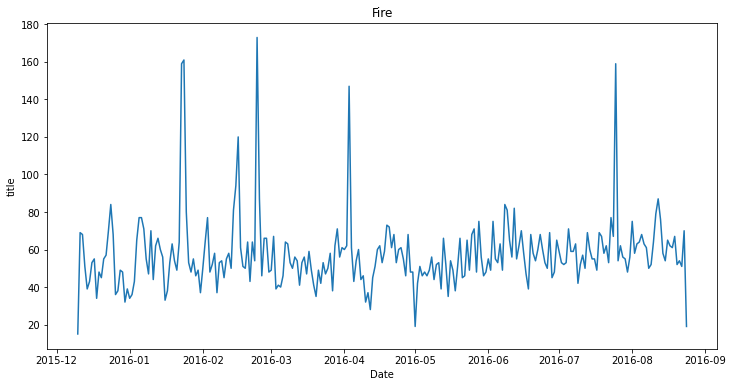

In [41]:
df1 = df[df['reason'] == "Fire"]
byDate = df1.groupby(by="Date").count()['title']
plt.figure(figsize=(12, 6))
sns.lineplot(data = byDate).set_title('Fire')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [42]:
bydayandhour = df.groupby(['dayofweek','hour']).count().unstack()['reason']
bydayandhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

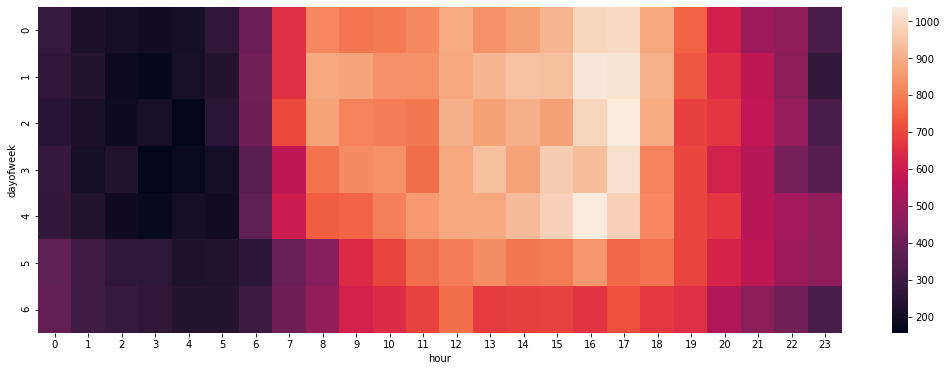

In [43]:
plt.figure(figsize=(18, 6))
sns.heatmap(bydayandhour)

** Now create a clustermap using this DataFrame. **

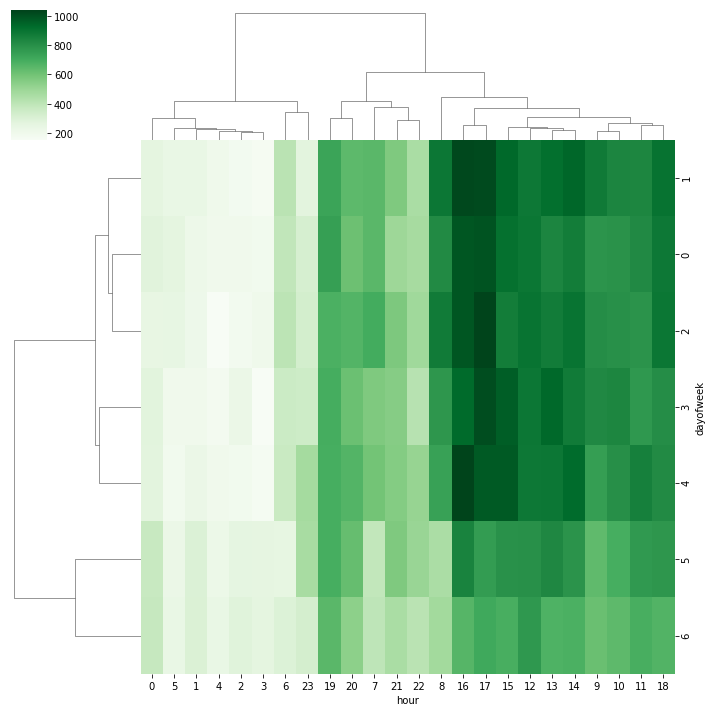

In [45]:
sns.clustermap(bydayandhour, cmap="Greens")

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [47]:
bymonthandhour = df.groupby(['dayofweek','month']).count().unstack()['reason']
bymonthandhour

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065
5,2291,1441,1266,1734,1444,1388,1695,1099,978
6,1960,1229,1102,1488,1424,1333,1672,1021,907


<AxesSubplot:xlabel='month', ylabel='dayofweek'>

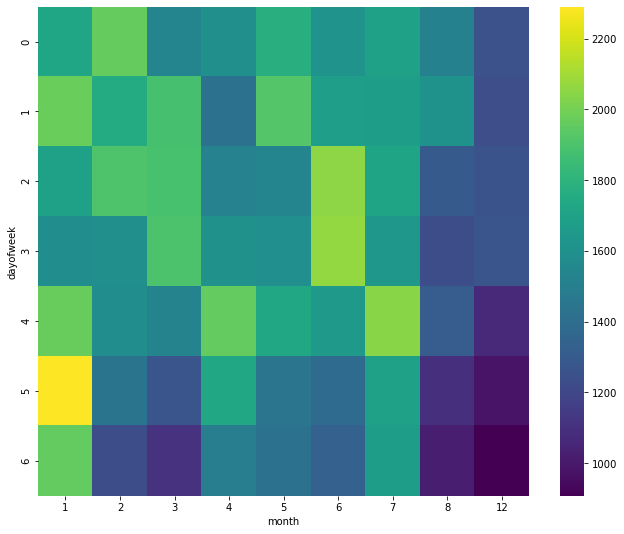

In [55]:
plt.figure(figsize=(11, 9))
sns.heatmap(bymonthandhour, cmap="viridis")

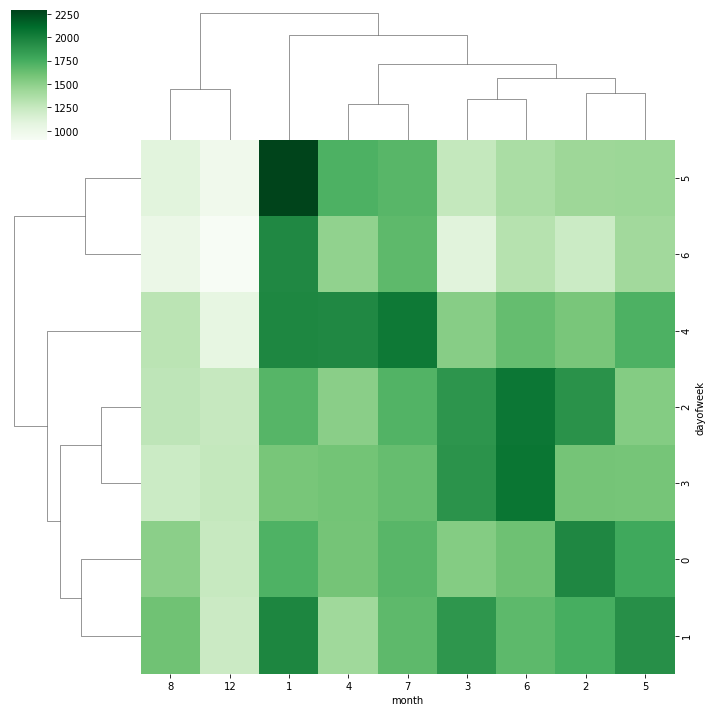

In [56]:
sns.clustermap(bydayandhour, cmap="Greens")

**Continue exploring the Data however you see fit!**
# Great Job!

Below is some code for mapping the data, there is nothing show since the notebook becomes too heavy if they are run (~120mb).
In order to try it out run it yourself.

In [61]:
print(np.max(df["lat"]))
print(np.min(df["lat"]))

41.1671565
30.333596000000004


In [62]:
print(np.max(df["lng"]))
print(np.min(df["lng"]))

-74.9950414
-95.5955947


In [66]:
#As we can see above and below that's a lot of distance with most of the data aroun one point

In [ ]:
#let's try the maps
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="lng", hover_name="twp", hover_data=["title", "desc"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map") 
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [67]:
#40.5
#-75.75
#39.9
#-74.95
mappingdf = df[(df['lat'] > 39.9) & (df['lat'] < 40.5) & (df['lng'] > -75.75) & (df['lng'] < -74.95)]

In [ ]:
fig = px.scatter_mapbox(mappingdf, lat="lat", lon="lng", hover_name="twp", hover_data=["title", "desc"],
                        color_discrete_sequence=["fuchsia"], zoom=9, height=550)
fig.update_layout(mapbox_style="open-street-map") 
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.scatter_mapbox(mappingdf,color="reason" ,lat="lat", lon="lng", hover_name="twp", hover_data=["title", "desc"],
                     zoom=9, height=550)
fig.update_layout(mapbox_style="open-street-map") 
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [80]:
print(df.lat.nunique())
print(df.lng.nunique())
del fig

14579
14586
